In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, glob
import gzip
import random
import tqdm
import json
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

from IPython import display
import matplotlib as mpl
from matplotlib import pyplot as plt
from google.colab import drive
from datetime import datetime

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


In [3]:
df = pd.read_csv('/content/apartments_for_rent_classified_10K.csv', sep = ';', encoding = 'cp1252')
df.head().T

,0,1,2,3,4
id,5668626895,5664597177,5668626833,5659918074,5668626759
category,housing/rent/apartment,housing/rent/apartment,housing/rent/apartment,housing/rent/apartment,housing/rent/apartment
title,"Studio apartment 2nd St NE, Uhland Terrace NE,...",Studio apartment 814 Schutte Road,"Studio apartment N Scott St, 14th St N, Arling...",Studio apartment 1717 12th Ave,"Studio apartment Washington Blvd, N Cleveland ..."
body,"This unit is located at second St NE, Uhland T...","This unit is located at 814 Schutte Road, Evan...","This unit is located at N Scott St, 14th St N,...","This unit is located at 1717 12th Ave, Seattle...","This unit is located at Washington Blvd, N Cle..."
amenities,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.0,1.0,NaN
bedrooms,0.0,1.0,0.0,0.0,0.0
currency,USD,USD,USD,USD,USD
fee,No,No,No,No,No
has_photo,Thumbnail,Thumbnail,Thumbnail,Thumbnail,Thumbnail


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5.623396e+09,7.021025e+07,5.508654e+09,5.509248e+09,5.668610e+09,5.668626e+09,5.668663e+09
bathrooms,9966.0,1.380544e+00,6.154099e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.500000e+00
bedrooms,9993.0,1.744021e+00,9.423539e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
price,10000.0,1.486277e+03,1.076508e+03,2.000000e+02,9.490000e+02,1.270000e+03,1.695000e+03,5.250000e+04
square_feet,10000.0,9.458105e+02,6.557557e+02,1.010000e+02,6.490000e+02,8.020000e+02,1.100000e+03,4.000000e+04
latitude,9990.0,3.769516e+01,5.495851e+00,2.131550e+01,3.367985e+01,3.880980e+01,4.134980e+01,6.159400e+01
longitude,9990.0,-9.465225e+01,1.575980e+01,-1.580221e+02,-1.013017e+02,-9.365160e+01,-8.220998e+01,-7.019160e+01
time,10000.0,1.574891e+09,3.762395e+06,1.568744e+09,1.568781e+09,1.577358e+09,1.577359e+09,1.577362e+09


In [6]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [9]:
df.dtypes


id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price              int64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [12]:
df.shape

(10000, 22)

# *Missing Valuse*

In [13]:
df.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

In [14]:
df.pets_allowed.value_counts()


pets_allowed
Cats,Dogs    5228
Cats          485
Dogs          124
Name: count, dtype: int64

In [15]:
df.loc[df['cityname'].isna() | df['state'].isna(), ['longitude', 'latitude']].value_counts()


longitude  latitude
-98.5576   39.8163     66
-82.1971   28.4590      1
Name: count, dtype: int64

In [16]:
print(df.amenities.value_counts()[:15])
print('-' * 50)
print(df.amenities.value_counts()[-10:])

amenities
Parking                                                          229
Dishwasher,Refrigerator                                          225
Pool                                                             171
Dishwasher,Parking,Pool                                          149
Dishwasher                                                       147
Dishwasher,Parking,Refrigerator                                   94
Parking,Pool                                                      93
Refrigerator                                                      85
Parking,Storage                                                   68
Parking,Refrigerator                                              67
Gym,Parking,Pool                                                  59
Dishwasher,Parking,Pool,Refrigerator                              56
Gym,Pool                                                          56
Dishwasher,Elevator,Internet Access,Parking,Pool,Refrigerator     41
Dishwasher,Garbage Dispo

In [17]:
print(df.amenities.value_counts()[-50:-10])


amenities
Cable or Satellite,Dishwasher,Fireplace,Internet Access,Parking,Patio/Deck,Refrigerator,Storage                                                    1
AC,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Gym,Patio/Deck,Playground,Pool,Refrigerator,Washer Dryer                                     1
Cable or Satellite,Clubhouse,Dishwasher,Gated,Internet Access,Patio/Deck,Pool,Refrigerator                                                         1
AC,Cable or Satellite,Dishwasher,Garbage Disposal,Playground,Pool                                                                                  1
Cable or Satellite,Dishwasher,Garbage Disposal,Gated,Internet Access,Parking,Patio/Deck,Pool,Refrigerator                                          1
Garbage Disposal,Gated,Internet Access,Parking,Patio/Deck,Refrigerator                                                                             1
Fireplace,Gym,Parking,Pool,Tennis,Washer Dryer                                                  

In [18]:
df.isna().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

In [19]:
df = df.drop(['address'], axis=1)
df.loc[df['pets_allowed'].isna(), 'pets_allowed'] = 'None'

In [20]:
## remove null rows for bathrooms, bedrooms, price, price_display, latitude, longitude
print(f"Removing {df.loc[df['bathrooms'].isna() | df['bedrooms'].isna() | df['price'].isna() | df['price_display'].isna() | df['latitude'].isna() | df['longitude'].isna(), 'id'].shape} entries with null values.")
df = df.dropna(subset=['bathrooms', 'bedrooms', 'price', 'price_display', 'latitude', 'longitude'])
df.isna().sum()


Removing (50,) entries with null values.


id                  0
category            0
title               0
body                0
amenities        3508
bathrooms           0
bedrooms            0
currency            0
fee                 0
has_photo           0
pets_allowed        0
price               0
price_display       0
price_type          0
square_feet         0
cityname           67
state              67
latitude            0
longitude           0
source              0
time                0
dtype: int64

In [25]:
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-98.5576), 'cityname'] = 'Lebanon'
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-98.5576), 'state'] = 'KS'
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-75.9597), 'cityname'] = 'Cape Charles'
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-75.9597), 'state'] = 'VA'
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-92.2006), 'cityname'] = 'Waynesville'
df.loc[((df['cityname'].isna()) | (df['state'].isna())) & (df['longitude']==-92.2006), 'state'] = 'MO'

df = df.dropna(subset=['cityname', 'state'])
df.loc[:, ['cityname', 'state']].isna().sum()


cityname    0
state       0
dtype: int64

In [26]:
import pandas as pd

# First, fill NAs with 'basic'
df['amenities'] = df['amenities'].fillna(value='basic')

# Define luxury amenities
luxury_amenities = [
    "Gym", "Pool", "Clubhouse", "Hot Tub",
    "Doorman", "Gated", "View",
    "Tennis", "Elevator", "Fireplace",
    "Basketball Court", "Basketball", "Playground"
]

# Create a pattern for luxury amenities
luxury_pattern = '|'.join(luxury_amenities)

# Classify amenities as 'luxury' or 'basic'
df['amenities'] = ['luxury' if any(amenity in x for amenity in luxury_amenities) else 'basic' for x in df['amenities']]

# Check the counts of 'luxury' and 'basic'
print(df['amenities'].value_counts())


amenities
basic     5543
luxury    4340
Name: count, dtype: int64


In [28]:
df.isna().sum()

id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64

In [29]:
df = df.drop(['title', 'body', 'id'], axis=1)
df = df.drop(['category', 'currency', 'fee'], axis=1)
df = df.drop(['price_type'], axis=1)
df = df.drop(['price_display'],axis=1)


In [30]:
numer = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'time']
df.loc[:, numer].describe()

,bathrooms,bedrooms,price,square_feet,time
count,9883.000000,9883.000000,9883.000000,9883.000000,9.883000e+03
mean,1.380552,1.747040,1486.954670,943.237580,1.574865e+09
std,0.616038,0.941714,1078.622808,527.162123,3.775256e+06
min,1.000000,0.000000,200.000000,107.000000,1.568744e+09
25%,1.000000,1.000000,949.000000,650.000000,1.568781e+09
50%,1.000000,2.000000,1275.000000,803.000000,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,1.577359e+09
max,8.500000,9.000000,52500.000000,11318.000000,1.577362e+09


In [32]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [34]:
fig = make_subplots(rows=2, cols=2, subplot_titles=[f'Distribution of {feature}' for feature in numer[:4]])
positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for feature, pos in zip(numer[:4], positions):
    box_data = px.box(df, x=feature)
    fig.add_trace(
        go.Box(y=df[feature], name=f'{feature}'),
        row=pos[0], col=pos[1])

fig.update_layout(title_text="Numerical Variables Distribution - Box Plots", height=800, width=1000)
fig.show()


In [36]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample DataFrame
# Assuming 'df' contains your DataFrame with numerical variables
numer = df.select_dtypes(include='number').columns.tolist()

# Create subplots with subplot titles
fig = make_subplots(rows=2, cols=2, subplot_titles=[f'Distribution of {feature}' for feature in numer[:4]])

# Positions for the subplots
positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

# Custom colors for the box plots
box_colors = ['#FF5733', '#33FF57', '#3399FF', '#FF33E9']

# Loop through numerical features and positions
for i, (feature, pos) in enumerate(zip(numer[:4], positions)):
    # Create a box plot using Plotly Express
    box_data = px.box(df, x=feature)

    # Extract box plot traces and update colors
    box_trace = box_data['data'][0]
    box_trace.update(marker_color=box_colors[i])  # Update marker color

    # Add the box trace to the subplot
    fig.add_trace(
        box_trace,
        row=pos[0], col=pos[1])

# Update layout
fig.update_layout(title_text="Numerical Variables Distribution - Box Plots", height=800, width=1000)

# Show the figure
fig.show()


In [177]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=[f'Distribution of {feature}' for feature in numer[:4]])
positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for feature, pos in zip(numer[:4], positions):
    violin_data = px.violin(df, y=feature)
    fig.add_trace(
        go.Violin(y=df[feature], name=f'{feature}'),
        row=pos[0], col=pos[1])

fig.update_layout(title_text="Numerical Variables Distribution - Violin Plots", height=800, width=1000)
fig.show()


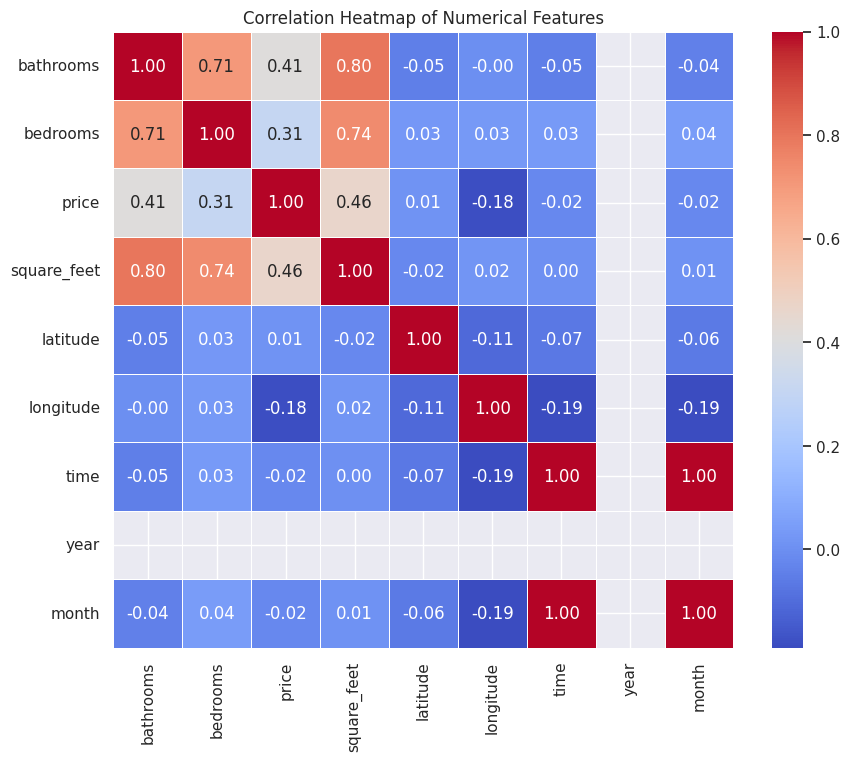

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


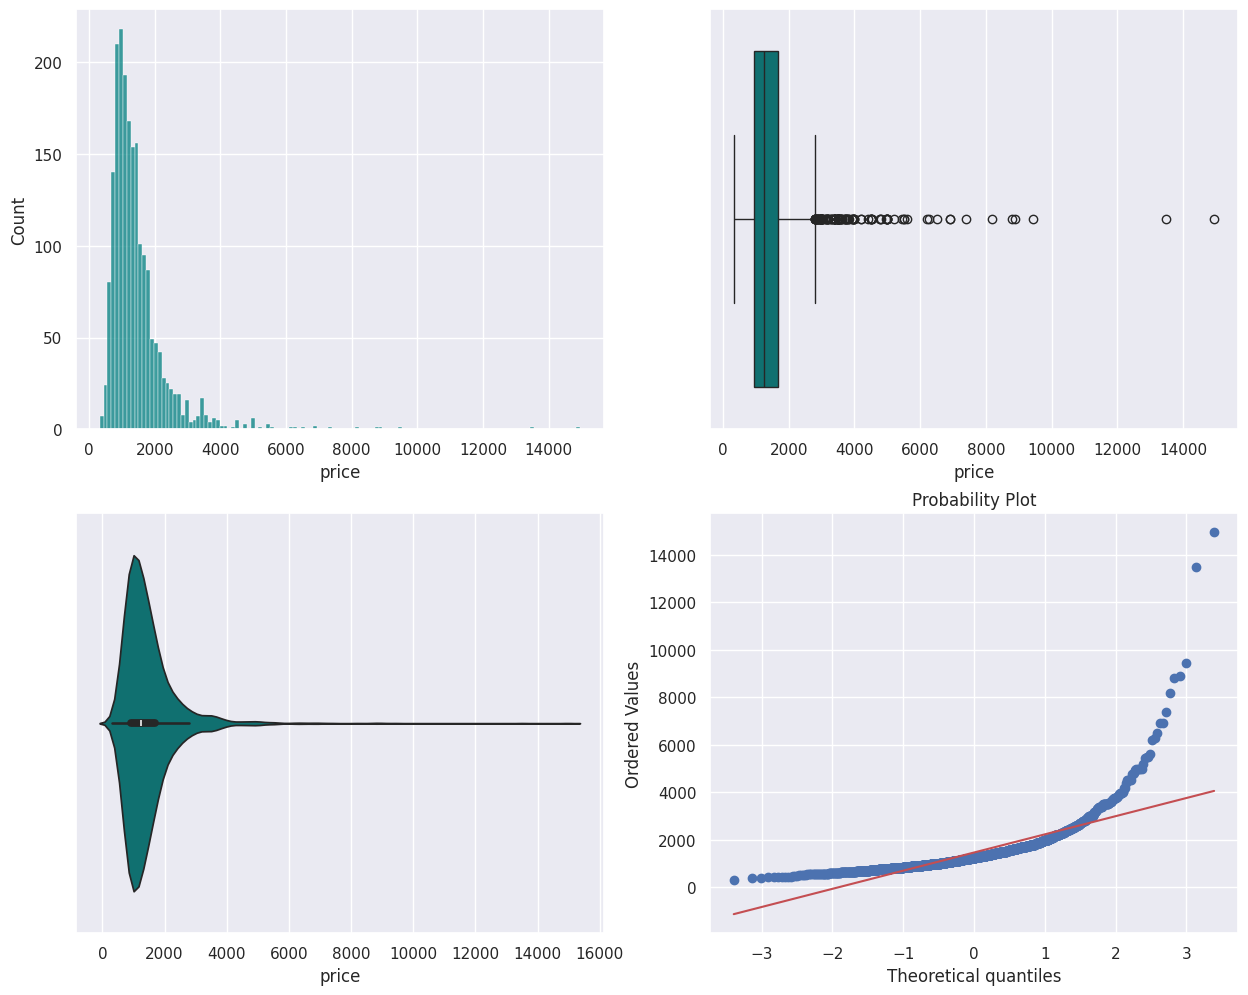

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
ax1 = sns.histplot(x = data['price'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = data['price'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = data['price'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(data['price'], plot=pylab)
pylab.show()

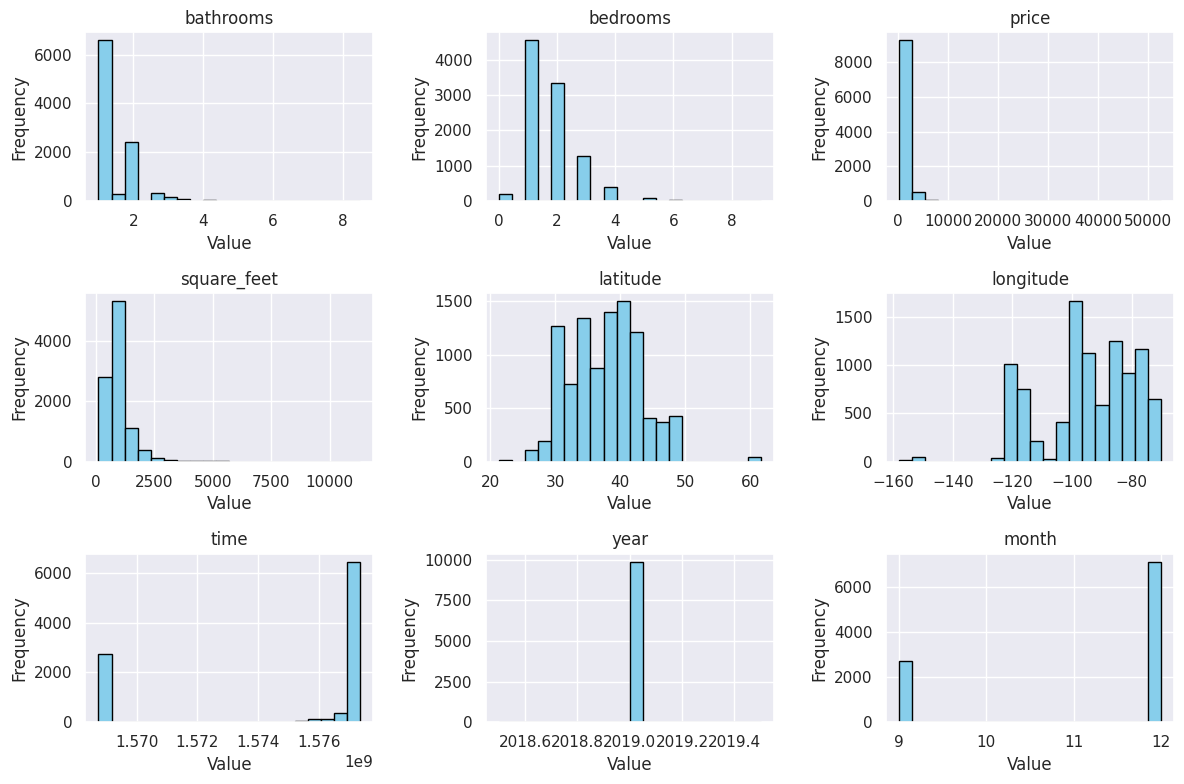

In [138]:
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Plot histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns.columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


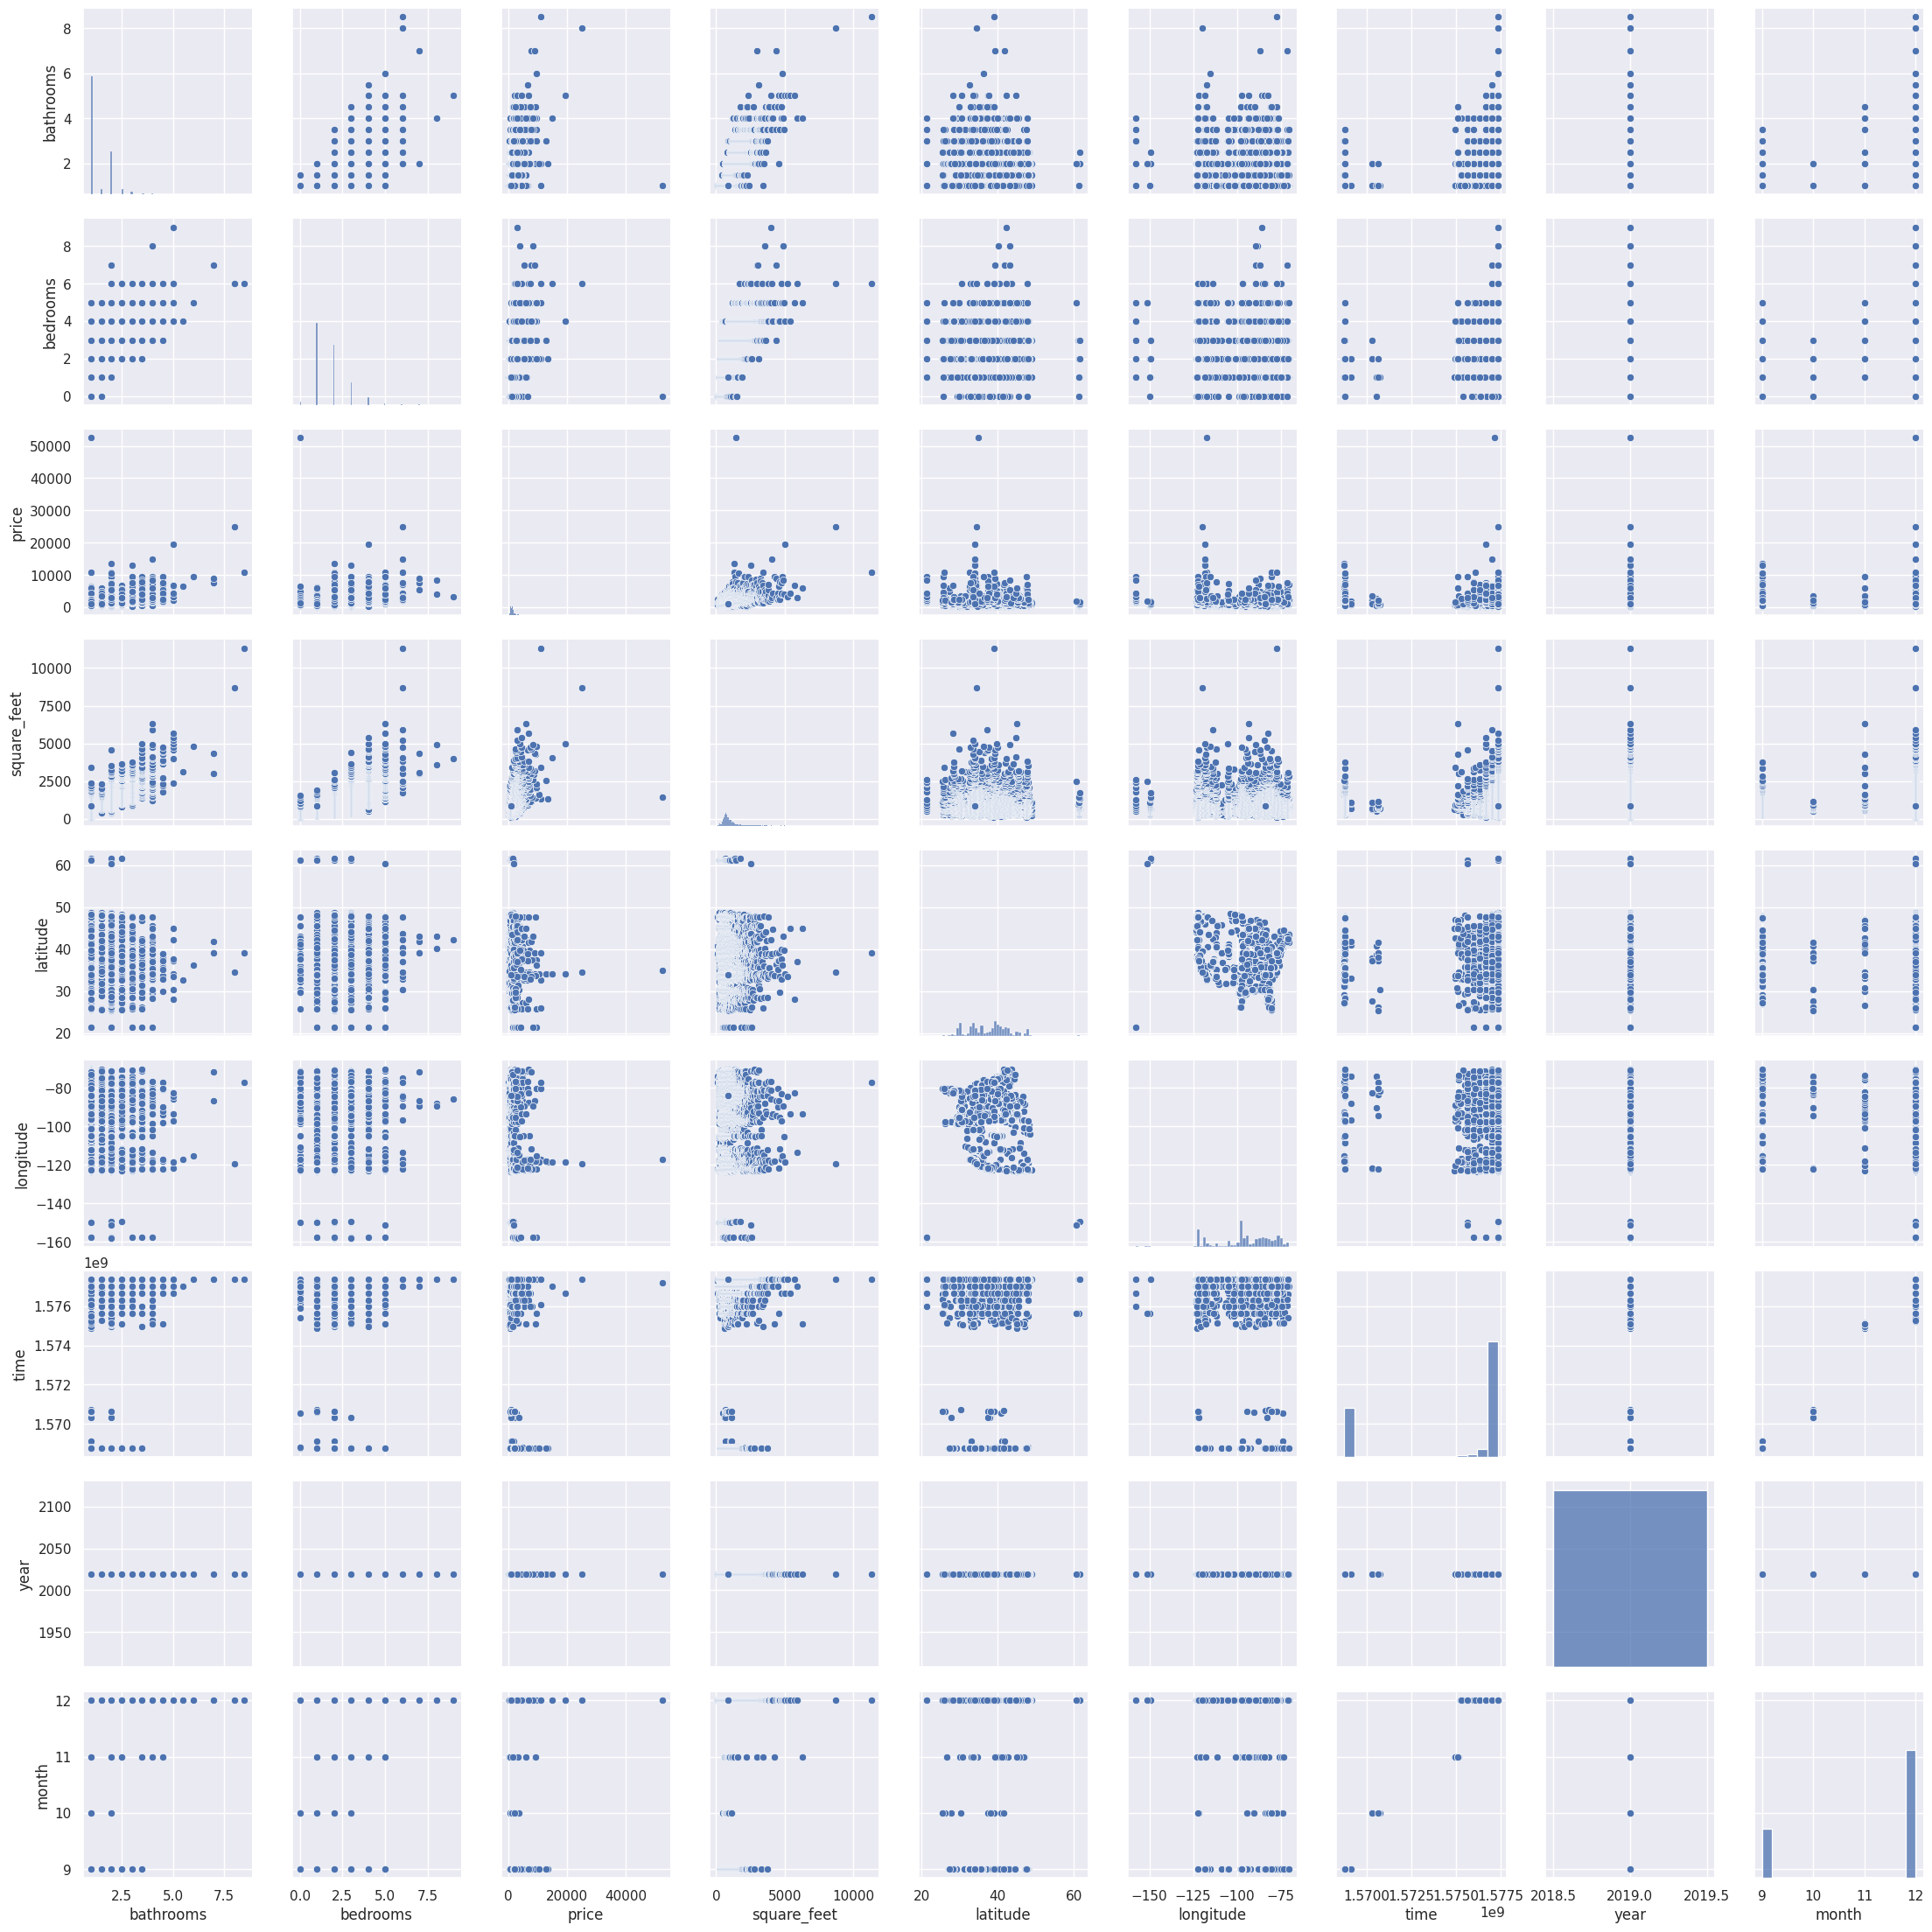

In [139]:
import seaborn as sns

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Plot pairplot
sns.pairplot(df[numerical_columns.columns])
plt.show()


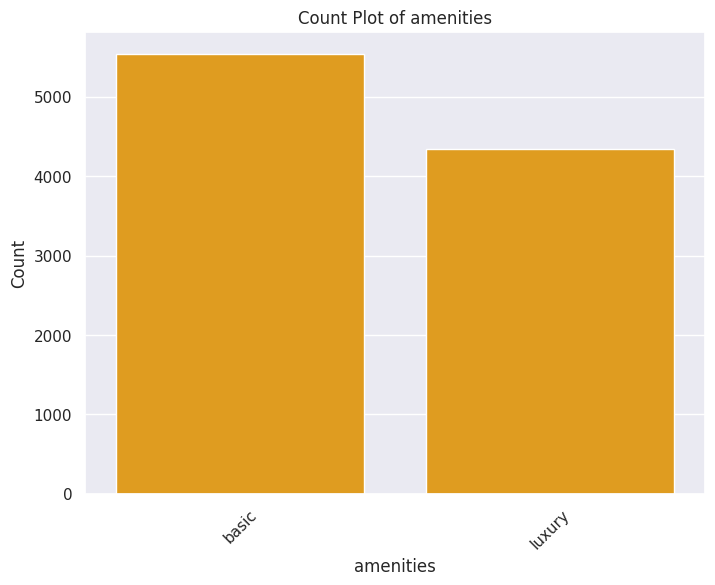

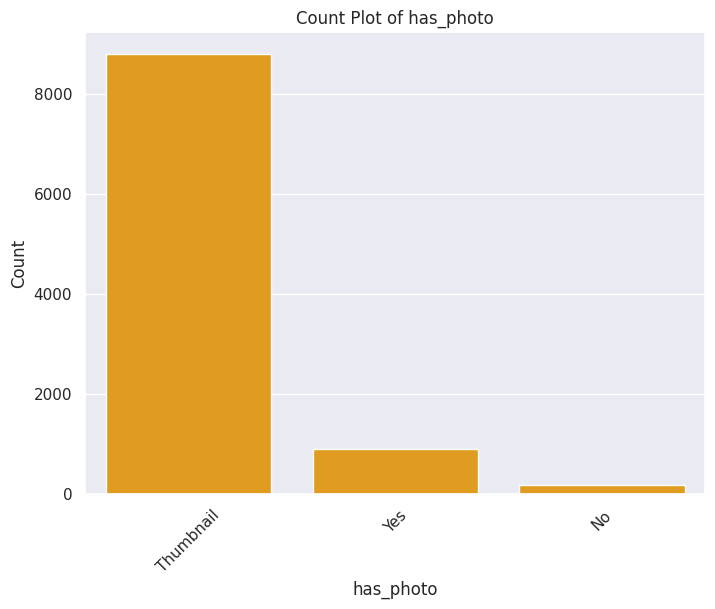

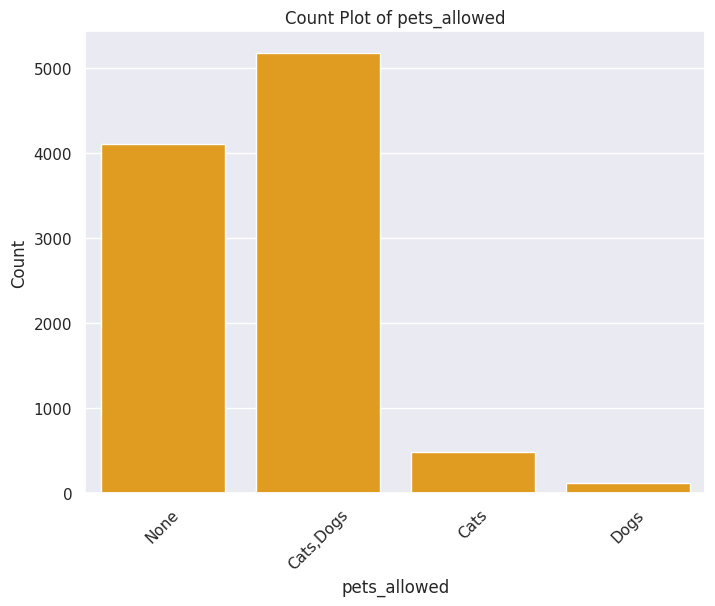

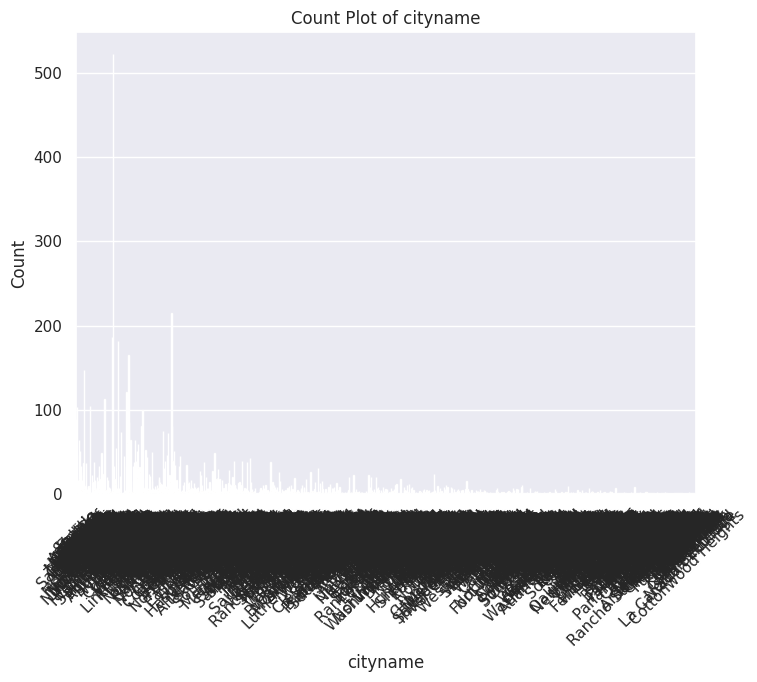

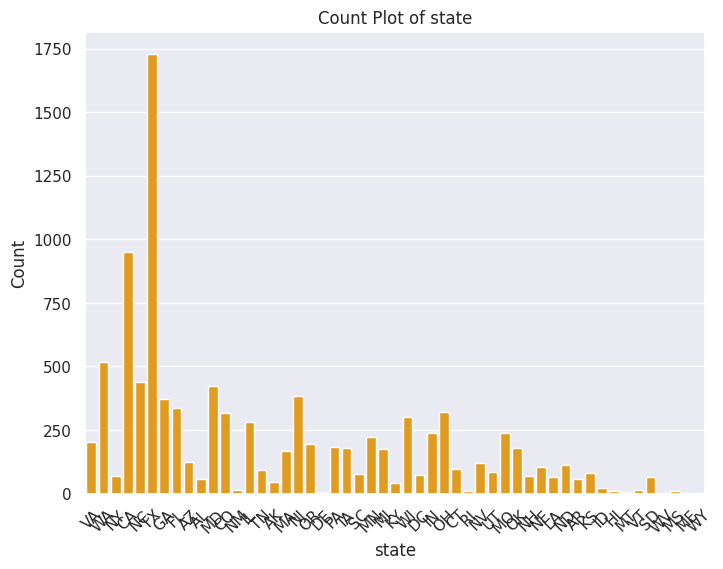

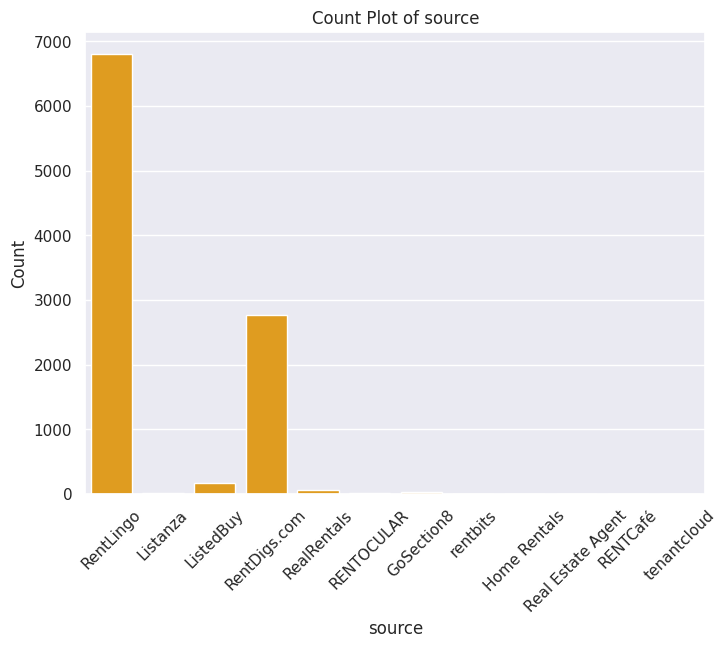

In [140]:
import seaborn as sns

# Select categorical columns
categorical_columns = df.select_dtypes(include='object')

# Plot count plots
for column in categorical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, color='orange')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


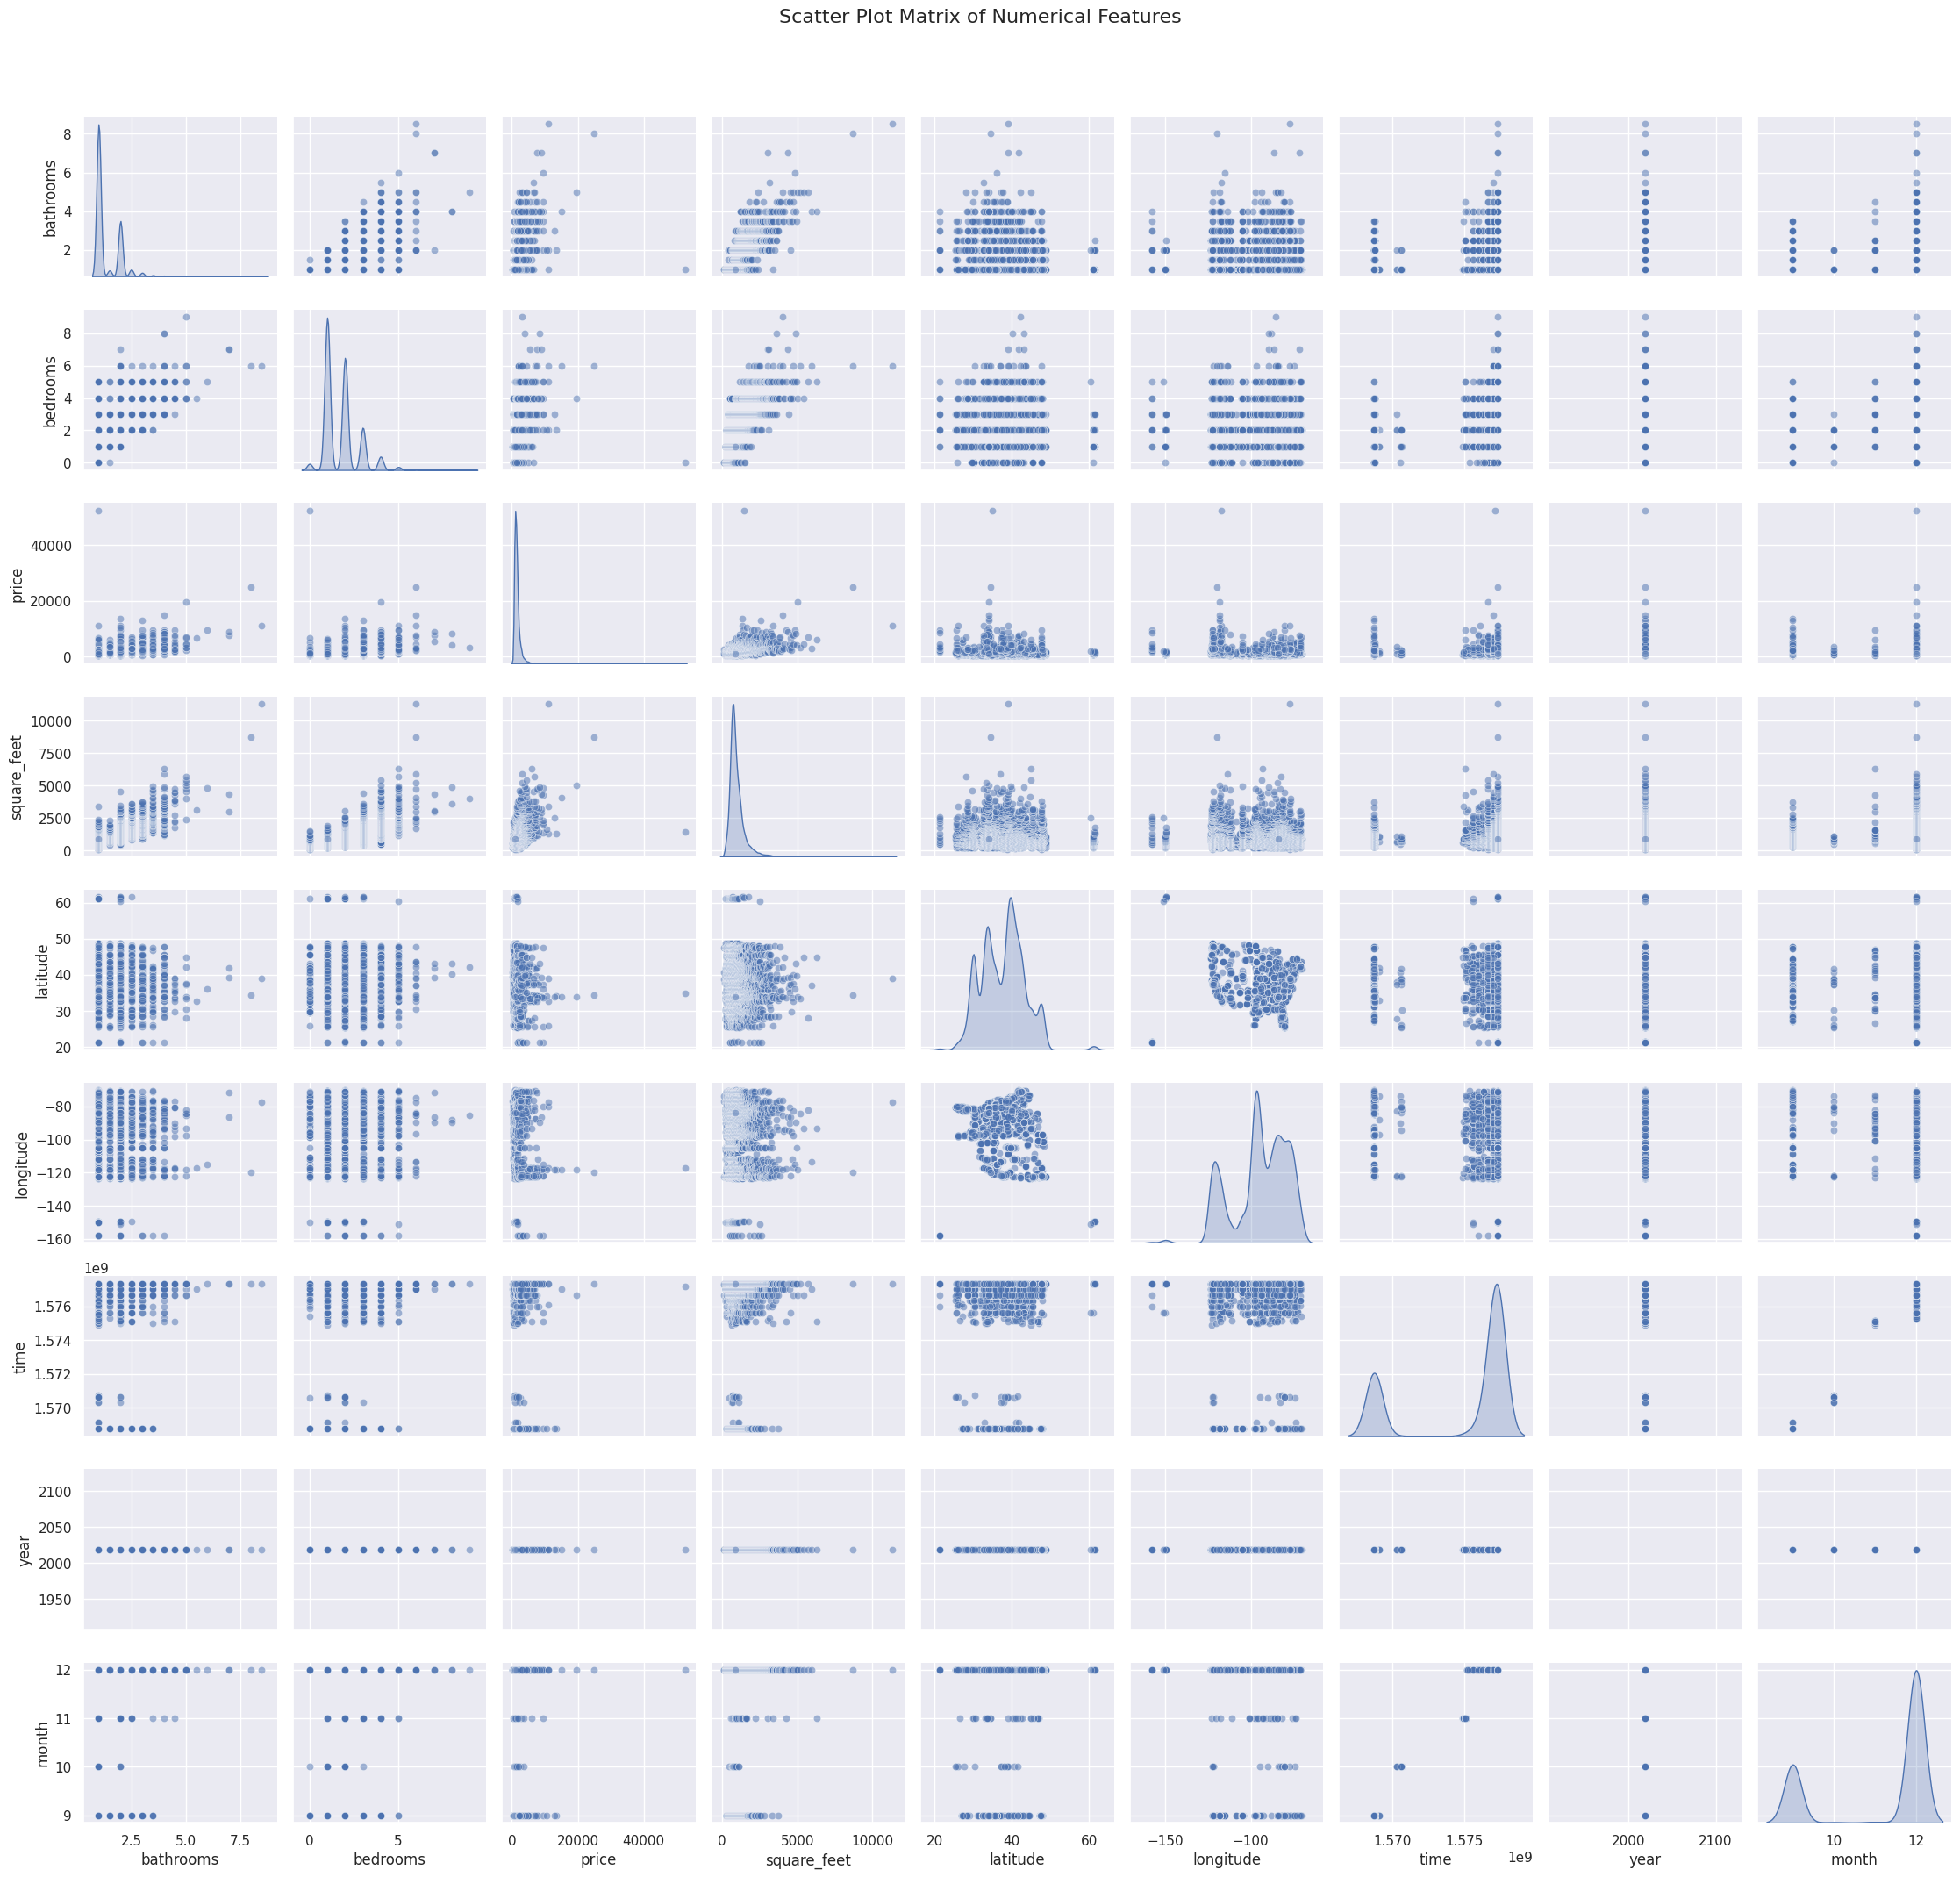

In [141]:

# Select numerical columns
numerical_columns = df.select_dtypes(include='number')

# Create scatter plot matrix
sns.pairplot(df[numerical_columns.columns], diag_kind='kde', plot_kws={'alpha': 0.5})

# Set title and adjust layout
plt.suptitle('Scatter Plot Matrix of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()


In [145]:
import folium

# Create a map centered around the mean latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Add markers for each data point
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.6,
        tooltip=row['cityname']
    ).add_to(mymap)

# Display the map
mymap.save('map.html')


# **MODELS**

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [81]:
data = pd.read_csv('/content/apartments_for_rent_classified_10K.csv', sep = ';', encoding = 'cp1252')

data = data.sample(2000, random_state=42)
data.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
6252,5509158654,housing/rent/apartment,Lease Spacious 2+2. Approx 930 sf of Living Sp...,Come see all of the new and exciting improveme...,"Clubhouse,Gym,Parking,Patio/Deck,Storage,Tennis",2.0,2.0,USD,No,Yes,NaN,965,$965,Monthly,930,NaN,Durham,NC,36.0514,-78.8807,RentDigs.com,1568777002
4684,5668638788,housing/rent/apartment,Two BR 15 Union Street,"This unit is located at fifteen Union Street, ...",NaN,1.0,2.0,USD,No,Thumbnail,NaN,1875,"$1,875",Monthly,786,15 Union St,New Brunswick,NJ,40.4841,-74.4526,RentLingo,1577360262
1731,5668622404,housing/rent/apartment,Studio apartment 20-28 E Daniels,"This unit is located at 20-28 E Daniels, Cinci...","Cable or Satellite,Dishwasher,Garbage Disposal...",1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",985,$985,Monthly,585,20-28 E Daniels,Cincinnati,OH,39.1679,-84.4933,RentLingo,1577359119
4742,5509154930,housing/rent/apartment,One BR - Welcome to Spring Creek of Edmond Apa...,"Square footage: 790 sq-ft, unit number: 320. W...","Fireplace,Garbage Disposal,Gym,Patio/Deck,Pool...",1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",719,$719,Monthly,790,NaN,Edmond,OK,35.6217,-97.4702,RentDigs.com,1568776675
4521,5668635773,housing/rent/apartment,One BR 691 BLOOMFIELD AVENUE,"This unit is located at 691 BLOOMFIELD AVENUE,...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2250,"$2,250",Monthly,775,691 Bloomfield Ave,Montclair,NJ,40.8206,-74.2133,RentLingo,1577360064


In [82]:
data.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,2.000000e+03,1992.000000,2000.000000,2000.000000,2000.000000,1995.000000,1995.000000,2.000000e+03
mean,5.624030e+09,1.376757,1.726000,1462.890500,947.293500,37.927308,-93.976139,1.574923e+09
std,6.993806e+07,0.609853,0.907378,943.424514,1007.486067,5.442771,15.548305,3.747364e+06
min,5.508654e+09,1.000000,0.000000,325.000000,101.000000,21.315500,-157.837900,1.568744e+09
25%,5.509256e+09,1.000000,1.000000,935.000000,645.750000,33.841950,-98.525300,1.568781e+09
50%,5.668583e+09,1.000000,2.000000,1246.500000,800.000000,38.941400,-93.302300,1.577356e+09
75%,5.668627e+09,2.000000,2.000000,1679.000000,1100.000000,41.602050,-81.583200,1.577359e+09
max,5.668663e+09,5.000000,6.000000,14950.000000,40000.000000,61.318600,-70.355900,1.577362e+09


In [83]:
data['time'] = pd.to_datetime(data['time'])

# Extract different time-related features
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day_of_week'] = data['time'].dt.dayofweek
data['hour'] = data['time'].dt.hour

# Create 'is_weekend' feature
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

# Display the updated DataFrame with the new features
print(data.head())




              id                category  \
6252  5509158654  housing/rent/apartment   
4684  5668638788  housing/rent/apartment   
1731  5668622404  housing/rent/apartment   
4742  5509154930  housing/rent/apartment   
4521  5668635773  housing/rent/apartment   

                                                  title  \
6252  Lease Spacious 2+2. Approx 930 sf of Living Sp...   
4684                             Two BR 15 Union Street   
1731                   Studio apartment 20-28 E Daniels   
4742  One BR - Welcome to Spring Creek of Edmond Apa...   
4521                       One BR 691 BLOOMFIELD AVENUE   

                                                   body  \
6252  Come see all of the new and exciting improveme...   
4684  This unit is located at fifteen Union Street, ...   
1731  This unit is located at 20-28 E Daniels, Cinci...   
4742  Square footage: 790 sq-ft, unit number: 320. W...   
4521  This unit is located at 691 BLOOMFIELD AVENUE,...   

                         

In [84]:

print(data['has_photo'].unique())
data['has_photo'] = data['has_photo'].map({'Thumbnail': 1, 'No': 0, 'Yes':1 })

print(data['pets_allowed'].unique())
data['pets_allowed'] = data['pets_allowed'].map(lambda x: 0 if x == 'None' else 1)

print(data['fee'].unique())
data['fee'] = data['fee'].map(lambda x: 0 if x == 'No' else 1)


#  apply one-hot encoding
data = pd.get_dummies(data, columns=['category', 'source'], drop_first=True)
# Display the updated DataFrame with one-hot encoded columns
print(data.head())

['Yes' 'Thumbnail' 'No']
[nan 'Cats,Dogs' 'Cats' 'Dogs']
['No']
              id                                              title  \
6252  5509158654  Lease Spacious 2+2. Approx 930 sf of Living Sp...   
4684  5668638788                             Two BR 15 Union Street   
1731  5668622404                   Studio apartment 20-28 E Daniels   
4742  5509154930  One BR - Welcome to Spring Creek of Edmond Apa...   
4521  5668635773                       One BR 691 BLOOMFIELD AVENUE   

                                                   body  \
6252  Come see all of the new and exciting improveme...   
4684  This unit is located at fifteen Union Street, ...   
1731  This unit is located at 20-28 E Daniels, Cinci...   
4742  Square footage: 790 sq-ft, unit number: 320. W...   
4521  This unit is located at 691 BLOOMFIELD AVENUE,...   

                                              amenities  bathrooms  bedrooms  \
6252    Clubhouse,Gym,Parking,Patio/Deck,Storage,Tennis        2.0       2

In [85]:
# Define the list of columns to drop
columns_to_drop = ['amenities', 'pets_allowed', 'address',"time","price_display","title","body","currency","id","state","cityname","price_type"]

# Drop the columns with a high number of missing values
data = data.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(data.head())

      bathrooms  bedrooms  fee  has_photo  price  square_feet  latitude  \
6252        2.0       2.0    0          1    965          930   36.0514   
4684        1.0       2.0    0          1   1875          786   40.4841   
1731        1.0       2.0    0          1    985          585   39.1679   
4742        1.0       1.0    0          1    719          790   35.6217   
4521        1.0       1.0    0          1   2250          775   40.8206   

      longitude  year  month  day_of_week  hour  is_weekend  \
6252   -78.8807  1970      1            3     0           0   
4684   -74.4526  1970      1            3     0           0   
1731   -84.4933  1970      1            3     0           0   
4742   -97.4702  1970      1            3     0           0   
4521   -74.2133  1970      1            3     0           0   

      category_housing/rent/home  source_Home Rentals  source_Listanza  \
6252                       False                False            False   
4684                  

In [86]:
data = data.dropna()

X = data.drop('square_feet', axis= 1)
y = data['square_feet']

bc_result = boxcox(y)
y_boxcox = bc_result[0]
lambda_ = bc_result[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size= 0.2, random_state = 42)


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 6252 to 6929
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bathrooms                   1987 non-null   float64
 1   bedrooms                    1987 non-null   float64
 2   fee                         1987 non-null   int64  
 3   has_photo                   1987 non-null   int64  
 4   price                       1987 non-null   int64  
 5   square_feet                 1987 non-null   int64  
 6   latitude                    1987 non-null   float64
 7   longitude                   1987 non-null   float64
 8   year                        1987 non-null   int32  
 9   month                       1987 non-null   int32  
 10  day_of_week                 1987 non-null   int32  
 11  hour                        1987 non-null   int32  
 12  is_weekend                  1987 non-null   int64  
 13  category_housing/rent/home  1987 no

In [87]:
X_train


,bathrooms,bedrooms,fee,has_photo,price,latitude,longitude,year,month,day_of_week,hour,is_weekend,category_housing/rent/home,source_Home Rentals,source_Listanza,source_ListedBuy,source_RENTCafé,source_RENTOCULAR,source_RealRentals,source_RentDigs.com,source_RentLingo,source_rentbits
6492,1.0,1.0,0,0,953,33.6795,-84.1596,1970,1,3,0,0,False,False,False,False,False,False,False,True,False,False
9053,2.0,2.0,0,1,2150,29.4624,-98.5253,1970,1,3,0,0,False,False,False,False,False,False,False,False,True,False
9100,2.0,3.0,0,1,1570,40.4678,-79.9134,1970,1,3,0,0,False,False,False,False,False,False,False,True,False,False
5028,1.5,2.0,0,1,563,33.4632,-94.0736,1970,1,3,0,0,False,False,False,False,False,False,False,True,False,False
239,1.0,0.0,0,1,1099,45.5091,-122.6449,1970,1,3,0,0,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,1.0,2.0,0,1,1220,39.0744,-94.5521,1970,1,3,0,0,False,False,False,False,False,False,False,False,True,False
3846,1.0,1.0,0,0,2235,34.1428,-117.9996,1970,1,3,0,0,False,False,False,False,False,False,False,True,False,False
8961,2.0,3.0,0,1,1300,33.9217,-84.8634,1970,1,3,0,0,False,False,False,False,False,False,False,False,True,False
2611,1.0,1.0,0,1,820,35.7863,-78.4845,1970,1,3,0,0,False,False,False,False,False,False,False,True,False,False


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Create a RandomForestRegressor instance
rf_regressor = RandomForestRegressor()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the Random Forest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

best_rf_model


RandomForestRegressor(max_depth=10, n_estimators=200)

In [89]:
# Step 1: Create a RandomForestRegressor instance
rf_regressor = RandomForestRegressor()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators':  [200],
    'max_depth': [10],
   'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the Random Forest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

best_rf_model




RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)

In [90]:
# Step 1: Create a RandomForestRegressor instance
rf_regressor = RandomForestRegressor()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
    'n_estimators':  [200],
    'max_depth': [10],

    'min_samples_leaf': [2],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the Random Forest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

print(best_rf_model.bootstrap)
print(best_rf_model.min_samples_split)



True
5


In [91]:

rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators':  [200],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'bootstrap': [True],
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_rf_model = grid_search.best_estimator_

best_rf_model

y_pred = best_rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.023414365842113143


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ParameterGrid

# Step 1: Define a list to store evaluation metrics for each hyperparameter combination
evaluation_results = []

# Step 2: Define the hyperparameter grid
param_grid = {
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
    'n_estimators':  [200],
    'max_depth': [10],
    'min_samples_leaf': [2],
}

# Step 3: Generate all possible combinations of hyperparameters
param_combinations = list(ParameterGrid(param_grid))

# Step 4: Iterate over each hyperparameter combination
for params in param_combinations:
    # Step 4.1: Train the Random Forest model with the current hyperparameters
    rf_model = RandomForestRegressor(**params)
    rf_model.fit(X_train, y_train)

    # Step 4.2: Make predictions
    y_pred = rf_model.predict(X_test)

    # Step 4.3: Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Step 4.4: Store the evaluation metrics along with the hyperparameters
    evaluation_results.append({
        'Hyperparameters': params,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

# Step 5: Print evaluation results for all hyperparameter combinations
for result in evaluation_results:
    print("Hyperparameters:", result['Hyperparameters'])
    print("Mean Squared Error:", result['MSE'])
    print("Root Mean Squared Error:", result['RMSE'])
    print("Mean Absolute Error:", result['MAE'])
    print("R-squared (R2):", result['R2'])
    print()


Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.022978339645618167
Root Mean Squared Error: 0.15158607998631723
Mean Absolute Error: 0.10621271810258728
R-squared (R2): 0.7185981682388569

Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 0.023432778566035234
Root Mean Squared Error: 0.15307768800852473
Mean Absolute Error: 0.10714782161530753
R-squared (R2): 0.7130329295575102

Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 0.023543102996812563
Root Mean Squared Error: 0.15343761923600274
Mean Absolute Error: 0.10774747029511397
R-squared (R2): 0.7116818529615705

Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0

# Method 2: Gradient Boosting Regressor

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Create a GradientBoostingRegressor instance
gb_regressor = GradientBoostingRegressor()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the Gradient Boosting model with the best hyperparameters
best_gb_model = grid_search.best_estimator_
best_gb_model


GradientBoostingRegressor()

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Create a GradientBoostingRegressor instance
gb_regressor = GradientBoostingRegressor()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [50],
    'learning_rate': [ 0.2],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the Gradient Boosting model with the best hyperparameters
best_gb_model = grid_search.best_estimator_
best_gb_model

GradientBoostingRegressor(learning_rate=0.2, min_samples_split=10,
                          n_estimators=50)

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the values of the min_samples_leaf parameter
min_samples_leaf_values = [1, 2, 4]

# Iterate over each value of min_samples_leaf
for min_samples_leaf in min_samples_leaf_values:
    # Create a GradientBoostingRegressor instance with the current min_samples_leaf value
    gb_regressor = GradientBoostingRegressor(
        n_estimators=50,
        learning_rate=0.2,
        max_depth=3,
        min_samples_split=10,
        min_samples_leaf=min_samples_leaf
    )

    # Train the model
    gb_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = gb_regressor.predict(X_test)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Print the MSE for the current min_samples_leaf value
    print(f"MSE for min_samples_leaf={min_samples_leaf}: {mse}")


MSE for min_samples_leaf=1: 0.023026185228532635
MSE for min_samples_leaf=2: 0.022845408943983493
MSE for min_samples_leaf=4: 0.022290325134393746


# METHOD 3 SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Create an SVR (Support Vector Regressor) instance
svm_regressor = SVR()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],

}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the SVR model with the best hyperparameters
best_svm_model = grid_search.best_estimator_



In [ ]:
best_svm_model

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Create an SVR (Support Vector Regressor) instance
svm_regressor = SVR()

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'C': [10],
    'kernel': ['poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01],
}

# Step 3: Perform Grid Search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Train the SVR model with the best hyperparameters
best_svm_model = grid_search.best_estimator_
best_svm_model

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


svm_regressor = SVR()


param_grid = {
    'C': [10],
    'kernel': ['poly'],
    'gamma': ['scale'],
}

grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

After a thorough exploration of various machine learning models, our project culminated in the selection of the Gradient Boosting Regressor as the most proficient predictor, surpassing competitors like Random Forest and Support Vector Machine (SVM). The model's outstanding performance is evident in its consistently low Mean Squared Error (MSE), indicating its capability to accurately capture intricate patterns within the dataset. Through meticulous tuning of hyperparameters and adept utilization of ensemble techniques, the Gradient Boosting Regressor showcased its supremacy by providing precise predictions while mitigating overfitting risks. This achievement holds significant implications across diverse domains, empowering decision-makers with invaluable insights and fortifying data-driven initiatives. Our successful endeavor underscores the potential of advanced machine learning approaches in addressing real-world challenges, marking a notable stride towards a future characterized by flourishing data-driven innovation and progress.


MODEL 4: LINEAR REGRESSION

In [ ]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv('/content/apartments_for_rent_classified_10K.csv', sep=';', encoding='cp1252')

# Dropping the Amenities column
df1 = df1.drop(['amenities', 'title', 'body', 'id', 'category', 'currency', 'fee', 'price_display', 'price_type', 'address', 'cityname'], axis=1)

# Filling missing values in categorical columns with the mode
columns_to_fill = ['pets_allowed', 'bathrooms', 'bedrooms', 'price', 'state']
df1[columns_to_fill] = df1[columns_to_fill].fillna(df1[columns_to_fill].mode().iloc[0])

# Filling missing values in numerical columns with mean
df1['latitude'].fillna(df1['latitude'].mean(), inplace=True)
df1['longitude'].fillna(df1['longitude'].mean(), inplace=True)

df1.isnull().sum()


In [103]:
da = df1.copy()  # Creating a copy of df and assigning it to data

# Min-Max Normalization
df_norm = da.drop(['pets_allowed', 'has_photo','source','state'], axis=1)  # Dropping columns 'pets_allowed' and 'has_photo' for normalization
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())  # Normalizing remaining columns

# Concatenating normalized data with 'pets_allowed' and 'has_photo' columns
combined_df = pd.concat([df_norm, da[['pets_allowed', 'has_photo','source','state']]], axis=1)

In [105]:
combined_df.head()
encoded_data = pd.get_dummies(combined_df, columns=['has_photo', 'pets_allowed','source', 'state'])


In [107]:
# Assume 'encoded_data' contains the preprocessed dataset
# Define features and target variable

features = encoded_data.drop(['price'], axis=1)  # Excluding 'price' column
target = encoded_data['price']

X = features
y =target

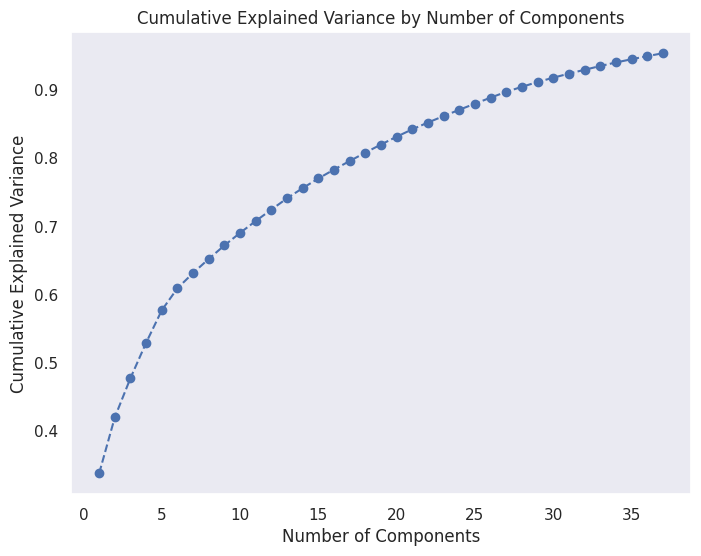

In [108]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=0.95)  # Retain 95% of variance in the data
X_pca = pca.fit_transform(X)

# Assessing explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plotting cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid()
plt.show()

Once PCA has been applied, we utilize the transformed data X_pca as the input for our models. We will then assess and compare the performance of the models both before and after feature reduction.


In [109]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'X' contains the features and 'y' contains the target variable for regression
selector = SelectKBest(score_func=f_regression, k=20)  # Select top 20 features
X_new = selector.fit_transform(X, y)

# Get selected feature indices
selected_features_indices = selector.get_support(indices=True)

# Retrieve selected feature names
selected_feature_names = X.columns[selected_features_indices]  # Replace 'X.columns' with your feature names

# Print selected feature names
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['bathrooms', 'bedrooms', 'square_feet', 'longitude',
       'pets_allowed_Dogs', 'state_CA', 'state_DC', 'state_HI', 'state_IA',
       'state_IN', 'state_MA', 'state_MO', 'state_NC', 'state_ND', 'state_NE',
       'state_NJ', 'state_OH', 'state_OK', 'state_TX', 'state_WA'],
      dtype='object')


In [110]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'encoded_data' contains the preprocessed dataset
# Define features and target variable

features = encoded_data.drop(['price'], axis=1)  # Excluding 'price' column
target = encoded_data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, target, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print('-----------------------------------------------------------------------')


Mean Squared Error: 0.00032264682355267706
R-squared Score: 0.007949776797228747
-----------------------------------------------------------------------


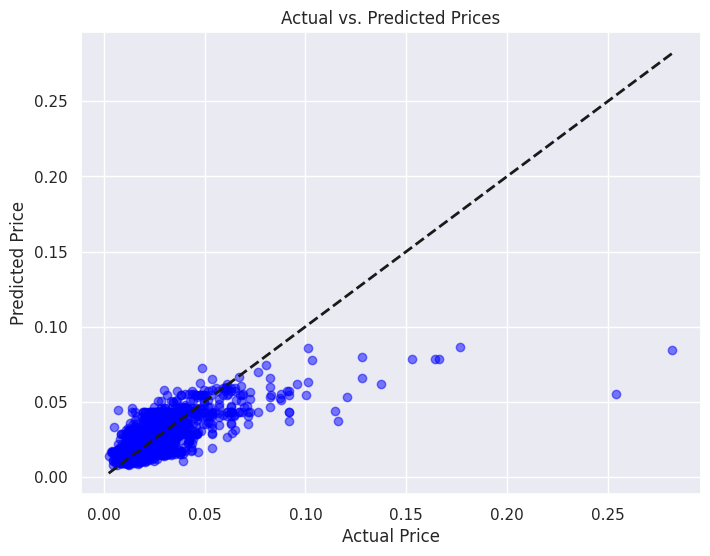

In [116]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()


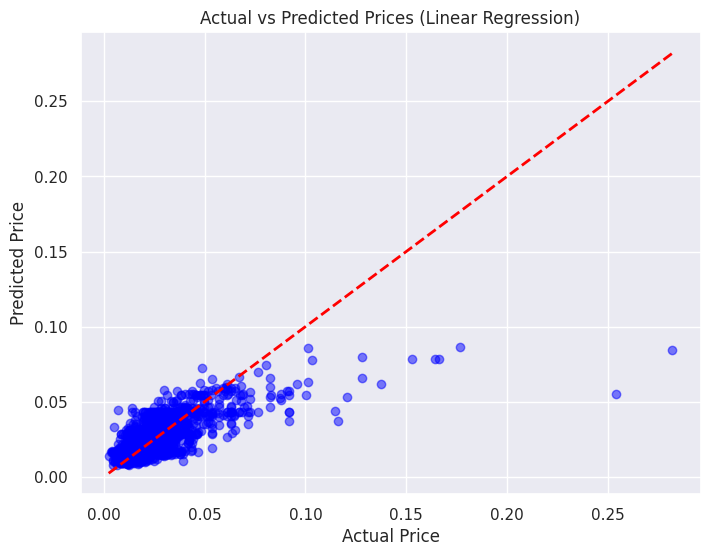

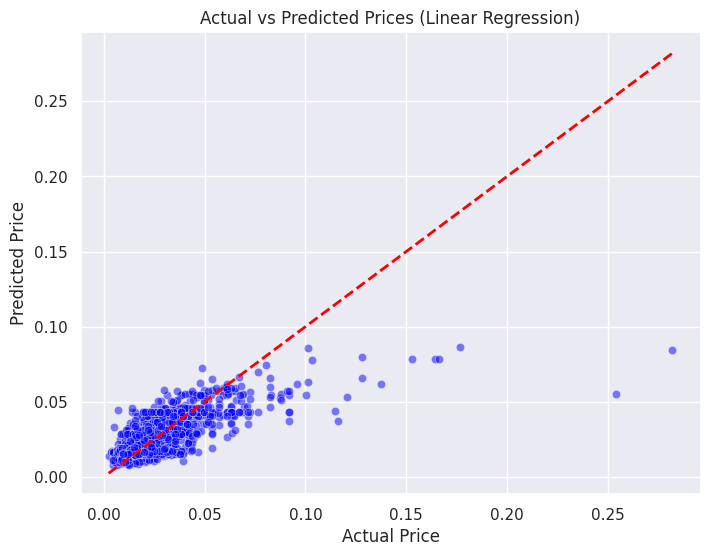

In [118]:
import seaborn as sns

# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.grid(True)
plt.show()


MODEL 5 : Ridge Regression with diff alphas


In [112]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define a dictionary to store results
ridge_results = {}

# Define alpha values
alpha_values = [0.1, 1, 10]

# Iterate over alpha values
for alpha in alpha_values:
    # Create Ridge Regression model
    ridge = Ridge(alpha=alpha)

    # Fit the model
    ridge.fit(X_train, y_train)

    # Make predictions
    predictions = ridge.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store results in the dictionary
    ridge_results[alpha] = {'MSE': mse, 'R2': r2}

# Print results
for alpha, results in ridge_results.items():
    print(f"For alpha={alpha}:")
    print(f"Mean Squared Error (MSE): {results['MSE']}")
    print(f"R-squared (R²) Score: {results['R2']}")


For alpha=0.1:
Mean Squared Error (MSE): 0.0002532285728675392
R-squared (R²) Score: 0.2213918008910858
For alpha=1:
Mean Squared Error (MSE): 0.00015540776705160413
R-squared (R²) Score: 0.5221638685501666
For alpha=10:
Mean Squared Error (MSE): 0.00015530460926736127
R-squared (R²) Score: 0.522481050358301


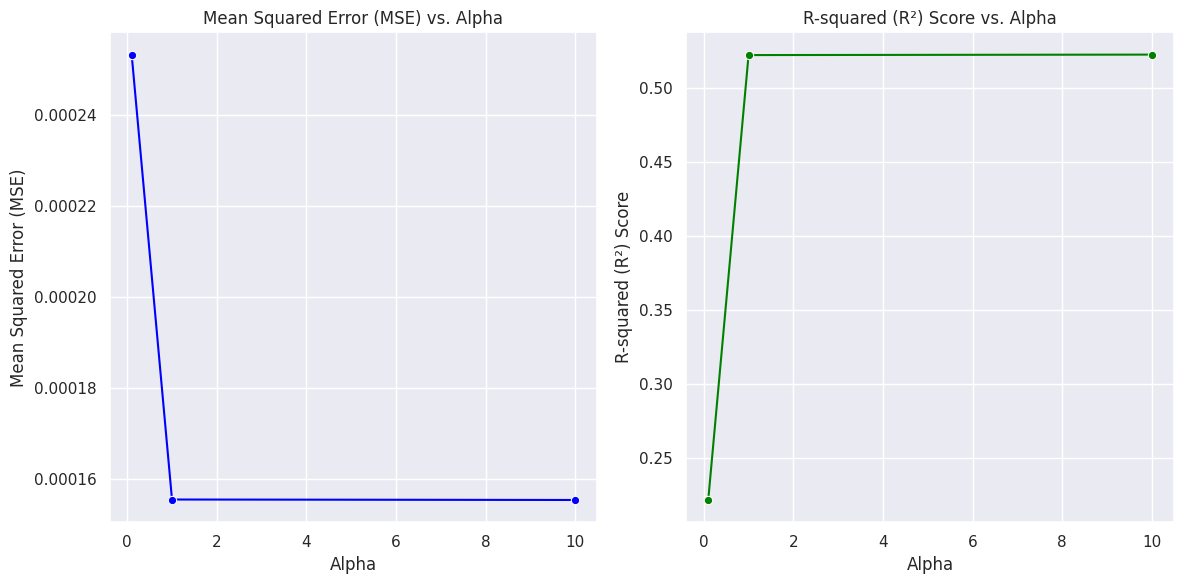

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert ridge_results dictionary to a DataFrame
import pandas as pd
ridge_df = pd.DataFrame(ridge_results).T

# Reset index to convert alpha values into a column
ridge_df.reset_index(inplace=True)
ridge_df.rename(columns={'index': 'Alpha'}, inplace=True)

# Melt the DataFrame to long format for seaborn plotting
melted_df = ridge_df.melt(id_vars='Alpha', var_name='Metric', value_name='Score')

# Create subplots
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
sns.lineplot(data=melted_df[melted_df['Metric'] == 'MSE'], x='Alpha', y='Score', marker='o', color='blue')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) vs. Alpha')

# Plot R2 score
plt.subplot(1, 2, 2)
sns.lineplot(data=melted_df[melted_df['Metric'] == 'R2'], x='Alpha', y='Score', marker='o', color='green')
plt.xlabel('Alpha')
plt.ylabel('R-squared (R²) Score')
plt.title('R-squared (R²) Score vs. Alpha')

plt.tight_layout()
plt.show()


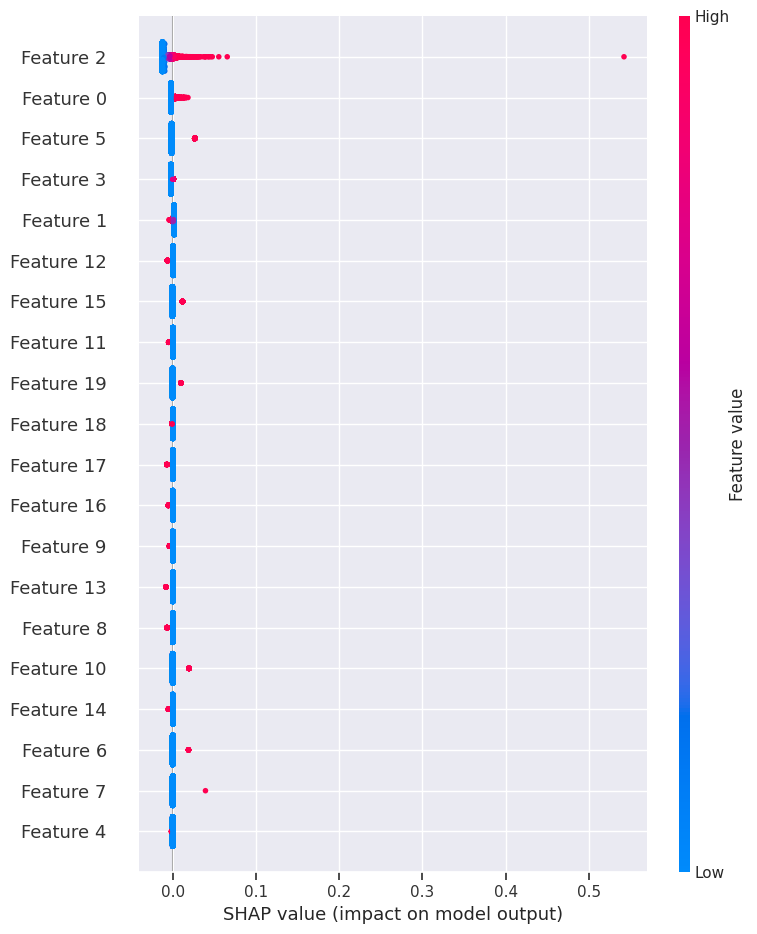

In [155]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import shap

# Train the Ridge regression model
alpha = 0.1  # Choose the best alpha value from your Ridge results
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Initialize the SHAP explainer with the Ridge regression model
explainer = shap.Explainer(ridge_model, X_train)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)


Model 6 : Kmeans


In [113]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize K-Means with different 'n_clusters' values
k_values = [3, 4, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # Calculate Inertia and Silhouette Score
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X, cluster_labels)

    print(f"For K={k}:")
    print(f"Inertia: {inertia}")
    print(f"Silhouette Score: {silhouette}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For K=3:
Inertia: 11919.317182613759
Silhouette Score: 0.20133216832130138


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For K=4:
Inertia: 10785.47580644935
Silhouette Score: 0.19964555596939212


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For K=5:
Inertia: 9936.62533339603
Silhouette Score: 0.22417624532181626


In [114]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_new)
cluster_labels = kmeans.labels_

# Calculate Inertia and Silhouette Score
inertia = kmeans.inertia_
silhouette = silhouette_score(X_new, cluster_labels)

print(f"For K= 5:")
print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For K= 5:
Inertia: 2391.3964919585396
Silhouette Score: 0.5751160717460866


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

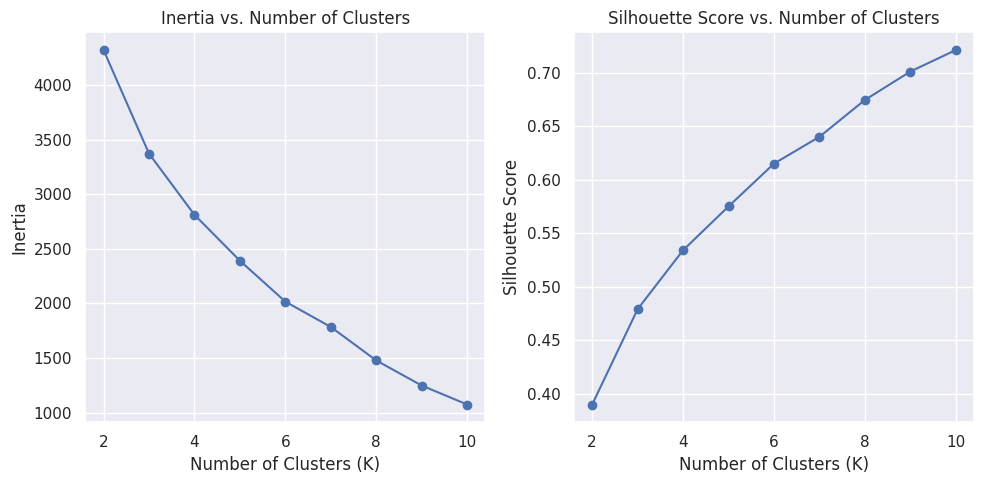

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the range of K values
k_values = range(2, 11)

# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Iterate over each K value
for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model
    kmeans.fit(X_new)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    silhouette = silhouette_score(X_new, cluster_labels)
    silhouette_scores.append(silhouette)

# Plot inertia
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

# Plot silhouette score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.tight_layout()
plt.show()


In [121]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

# Estimate bandwidth (this determines the size of the kernel)
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=1000)

# Perform Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)
cluster_labels = ms.labels_

# Calculate Inertia and Silhouette Score
inertia = None  # Inertia is not available for Mean Shift
silhouette = silhouette_score(X, cluster_labels)

print("For Mean Shift:")
print(f"Inertia: Not applicable")
print(f"Silhouette Score: {silhouette}")


For Mean Shift:
Inertia: Not applicable
Silhouette Score: 0.8817049090865836


# Model 7 MEAN **SHIFT**

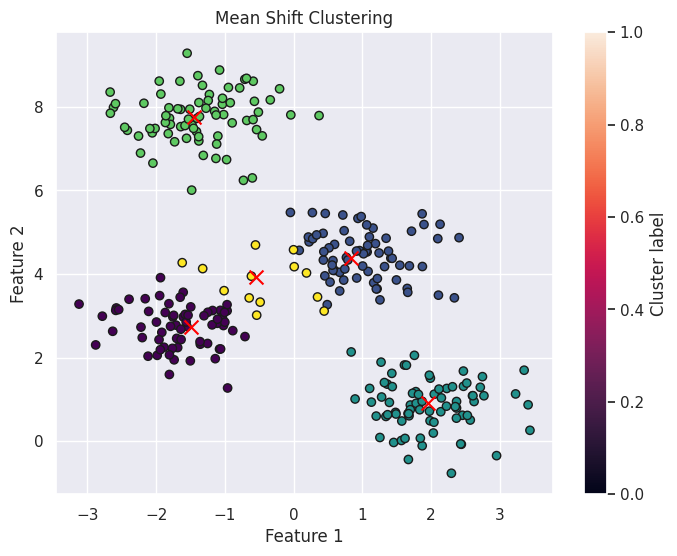

In [128]:
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Generate sample data (replace with your actual data)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Estimate bandwidth (this determines the size of the kernel)
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=1000)

# Perform Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth)
cluster_labels = ms.fit_predict(X)
cluster_centers = ms.cluster_centers_

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')

# Plot cluster centers
for center in cluster_centers:
    plt.scatter(center[0], center[1], marker='x', color='red', s=100)

plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster label')
plt.grid(True)
plt.show()


In [131]:
#Perform Mean Shift clustering
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import MeanShift, estimate_bandwidth
cleaned_data = df1
X = cleaned_data[['latitude', 'longitude']]

# Standardize the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Estimate bandwidth (this determines the size of the kernel)
bandwidth = estimate_bandwidth(X_scaled, quantile=0.1, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X_scaled)

MeanShift(bandwidth=0.6497851064350173)

In [132]:
# Retrieve cluster labels and cluster centers
cluster_labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Get the number of clusters
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Number of clusters detected by Mean Shift: {num_clusters}")

Number of clusters detected by Mean Shift: 10


Silhouette Score: 0.48593712955580987


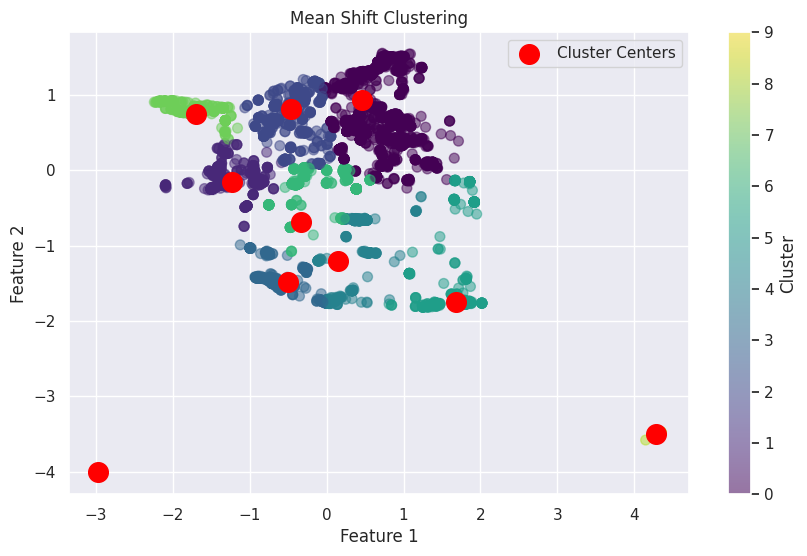

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

# Assuming X_scaled contains your standardized data
# Assuming cluster_labels and cluster_centers are obtained from Mean Shift clustering

# Scatter plot of the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Calculate silhouette score
silhouette = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette}")

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='red', s=200, label='Cluster Centers')

plt.legend()
plt.show()


## MODEL 8 : **DBSCAN**

In [125]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define DBSCAN parameters to try
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

# Initialize lists to store results
silhouette_scores = []

# Perform DBSCAN clustering for each combination of parameters
for eps in eps_values:
    for min_samples in min_samples_values:
        # Perform DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)

        # Calculate Silhouette Score
        silhouette = silhouette_score(X, cluster_labels)
        silhouette_scores.append((eps, min_samples, silhouette))

        print(f"For eps={eps}, min_samples={min_samples}:")
        print(f"Silhouette Score: {silhouette}")
        print("--------------------------")

# Print the best silhouette score and corresponding parameters
best_eps, best_min_samples, best_silhouette = max(silhouette_scores, key=lambda x: x[2])
print(f"Best Silhouette Score: {best_silhouette} (eps={best_eps}, min_samples={best_min_samples})")


For eps=0.1, min_samples=5:
Silhouette Score: 0.4533196999093387
--------------------------
For eps=0.1, min_samples=10:
Silhouette Score: 0.3791660752346619
--------------------------
For eps=0.1, min_samples=15:
Silhouette Score: 0.31201535643189593
--------------------------
For eps=0.5, min_samples=5:
Silhouette Score: 0.8563617319954908
--------------------------
For eps=0.5, min_samples=10:
Silhouette Score: 0.8232374913135987
--------------------------
For eps=0.5, min_samples=15:
Silhouette Score: 0.7989658465309081
--------------------------
For eps=1.0, min_samples=5:
Silhouette Score: 0.8570754031086051
--------------------------
For eps=1.0, min_samples=10:
Silhouette Score: 0.8245691646235312
--------------------------
For eps=1.0, min_samples=15:
Silhouette Score: 0.8022129446052119
--------------------------
Best Silhouette Score: 0.8570754031086051 (eps=1.0, min_samples=5)


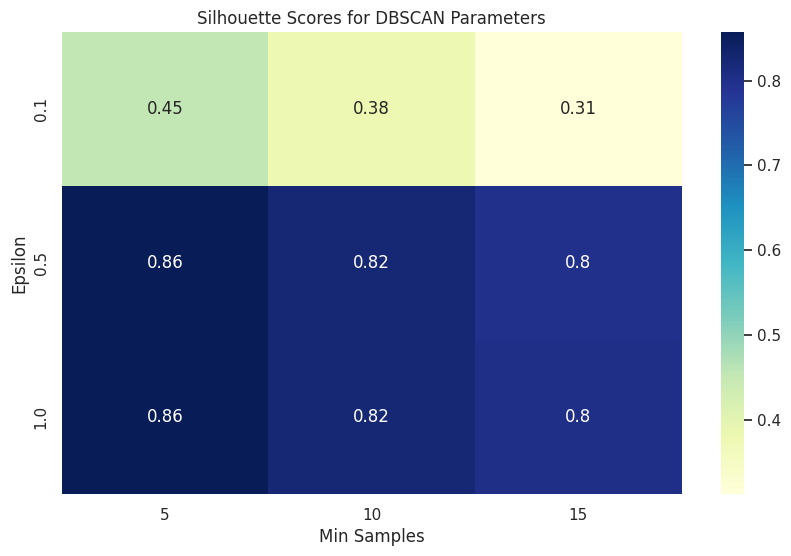

In [126]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract eps, min_samples, and silhouette scores from the results
eps_list = [result[0] for result in silhouette_scores]
min_samples_list = [result[1] for result in silhouette_scores]
silhouette_list = [result[2] for result in silhouette_scores]

# Create a 2D array for silhouette scores with eps_values as rows and min_samples_values as columns
silhouette_matrix = np.array(silhouette_list).reshape(len(eps_values), len(min_samples_values))

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_matrix, annot=True, cmap="YlGnBu", xticklabels=min_samples_values, yticklabels=eps_values)
plt.xlabel('Min Samples')
plt.ylabel('Epsilon')
plt.title('Silhouette Scores for DBSCAN Parameters')
plt.show()


AI

In [150]:
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of X_train: {X_train.shape}")

Shape of X_test: (2000, 20)
Shape of X_train: (8000, 20)


In [151]:
X_test = np.concatenate((X_test, np.zeros((X_train.shape[0] - X_test.shape[0], X_test.shape[1]))), axis=0)

print(f"Shape of X_test after resizing: {X_test.shape}")

Shape of X_test after resizing: (8000, 20)


 98%|===================| 7830/8000 [00:32<00:00]       

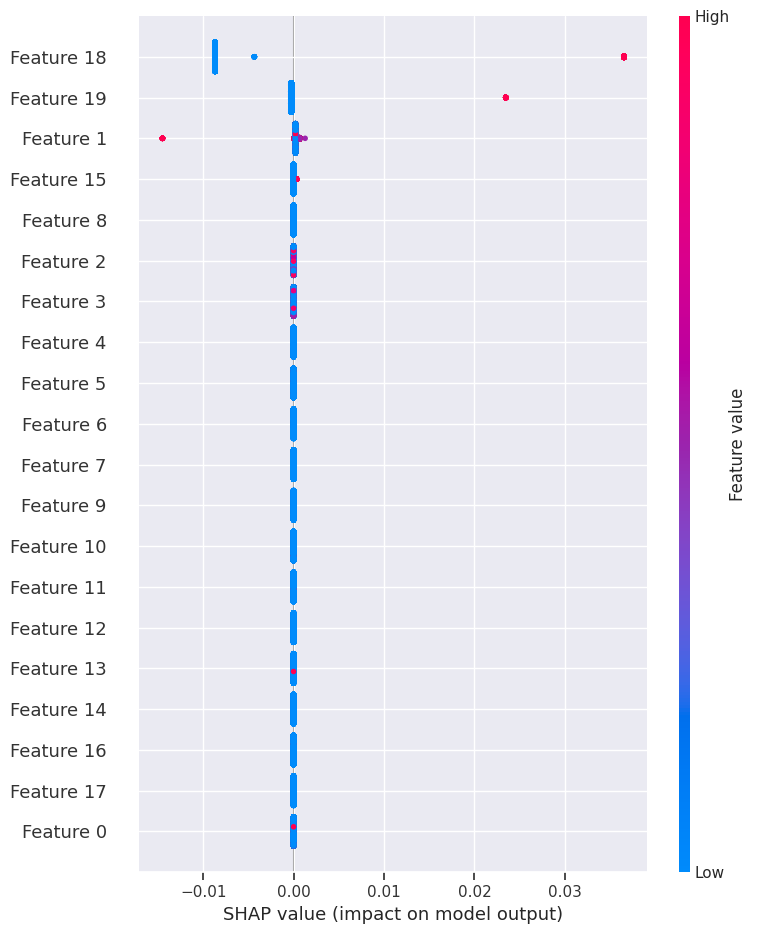

In [154]:
# Initialize the SHAP explainer with the RandomForestRegressor model
explainer = shap.Explainer(best_rf_model, X_train)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

